In [10]:
!pip install transformers
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install setfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 17.7 MB/s eta 0:00:00


In [12]:
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import sys
print(sys.version)

3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]


In [2]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [3]:
# Importing all necessary libraries.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn and TSNE.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn.
from sklearn.metrics.pairwise import pairwise_distances
# from sklearn.manifold.t_sne import (_joint_probabilities,
#                                     _kl_divergence)
#from sklearn.utils.extmath import _ravel
# Random state.
RS = 25111993

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns

sns.set_palette('muted')
sns.set_style("white")


In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
num_gen = 5
perc = 5
i=5

In [7]:
arq = '/content/drive/My Drive/Colab Notebooks/t5_key_text/original/base_emotions_train.csv'
ori = pd.read_csv(arq, encoding='utf-8', sep=';', decimal = ',')
arq = '/content/drive/My Drive/Colab Notebooks/t5_key_text/original/base_emotions_test.csv'
teste = pd.read_csv(arq, encoding='utf-8', sep=';', decimal = ',')

In [8]:
dici = {0:"sadness",
1:"joy",
2: 'love',
3:'anger',
4:'fear',
5:'surprise'}

ori['label_name'] = ori['label'].map(dici)
teste['label_name'] = teste['label'].map(dici)
ori.label.value_counts(normalize=True)

1    0.335125
0    0.291625
3    0.134937
4    0.121063
2    0.081500
5    0.035750
Name: label, dtype: float64

In [9]:
from datasets import Dataset, DatasetDict

train = Dataset.from_pandas(ori)

In [10]:
from sentence_transformers.losses import CosineSimilarityLoss

from setfit import SetFitModel, SetFitTrainer, sample_dataset

In [11]:
train_dataset = sample_dataset(train, label_column="label", num_samples=16)

In [12]:
classifica = SetFitModel.from_pretrained(
    "sentence-transformers/paraphrase-mpnet-base-v2",
    # use_differentiable_head=True,
    # head_params={"out_features": 6},
)

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [16]:
trainer = SetFitTrainer(
    model=classifica,
    train_dataset=train_dataset,
    # eval_dataset=eval,
    loss_class=CosineSimilarityLoss,
    # metric=f1_multiclass,
    batch_size=16,
    num_iterations=20, # The number of text pairs to generate for contrastive learning 40
    num_epochs=1, # The number of epochs to use for contrastive learning
    column_mapping={"text": "text", "label": "label"} # Map dataset columns to text/label expected by trainer
)

In [17]:
trainer.train()

Applying column mapping to training dataset


Generating Training Pairs:   0%|          | 0/20 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 3840
  Num epochs = 1
  Total optimization steps = 240
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/240 [00:00<?, ?it/s]

In [18]:
trainer.model._save_pretrained(save_directory="./setfit_output/")

In [19]:
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('sentence-transformers/paraphrase-mpnet-base-v2')
setfit = SentenceTransformer('./setfit_output/')

In [20]:
embeddings_test_or = []

embeddings_test_setfit = []

embeddings_test_or.append(model.encode(teste['text'].astype('str').values))

embeddings_test_setfit.append(setfit.encode(teste['text'].astype('str').values))

In [21]:
digits_proj = TSNE(verbose=1,
                   n_components = 2,
                   perplexity=60,
                   early_exaggeration = 6,
                   learning_rate  = 1000,
                   n_iter=2000,
                   metric = 'cosine',)
digits = digits_proj.fit_transform(embeddings_test_or[0])
teste['tsne_ori_x'] = digits[:,0].tolist()
teste['tsne_ori_y'] = digits[:,1].tolist()


digits_proj2 = TSNE(verbose=1,
                   n_components = 2,
                   perplexity=60,
                   early_exaggeration = 6,
                   learning_rate  = 1000,
                   n_iter=2000,
                   metric = 'cosine',)

digits2 = digits_proj2.fit_transform(embeddings_test_setfit[0])
teste['tsne_setfit_x'] = digits2[:,0].tolist()
teste['tsne_setfit_y'] = digits2[:,1].tolist()



[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.252s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.213789
[t-SNE] KL divergence after 250 iterations with early exaggeration: 34.383545
[t-SNE] KL divergence after 2000 iterations: 2.190897
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.257s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.085262
[t-SNE] KL divergence after 250 iterations with early exaggeration: 26.941578
[t-SNE] KL divergence after 2000 iterations: 1.050960


[Text(0.5, 1.0, 't-SNE Emotions Recognition - Original Sentence-Transformers')]

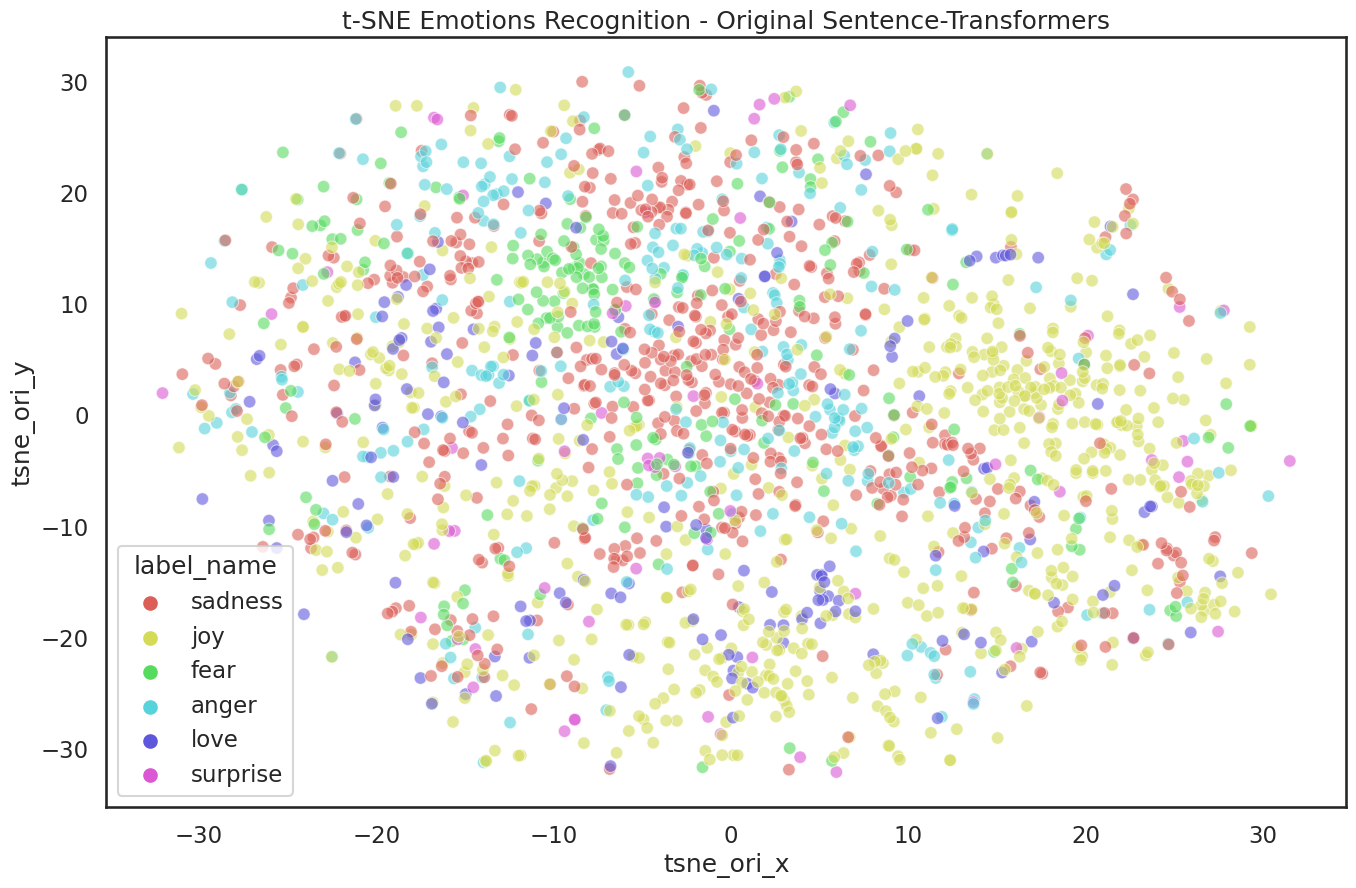

In [23]:
sns.set_context("talk")
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne_ori_x', y='tsne_ori_y',
    hue='label_name',
    # title = 't-SNE TREC Keyboeard Error',
    # size = 'source',
    # style = 'source',
    # markers=['o', 'd'],
    palette=sns.color_palette("hls", 6),
    data=teste,
    legend="full",
    alpha=0.6
).set(title='t-SNE Emotions Recognition - Original Sentence-Transformers')

[Text(0.5, 1.0, 't-SNE Emotions Recognition - Contrastive Sentence-Transformers')]

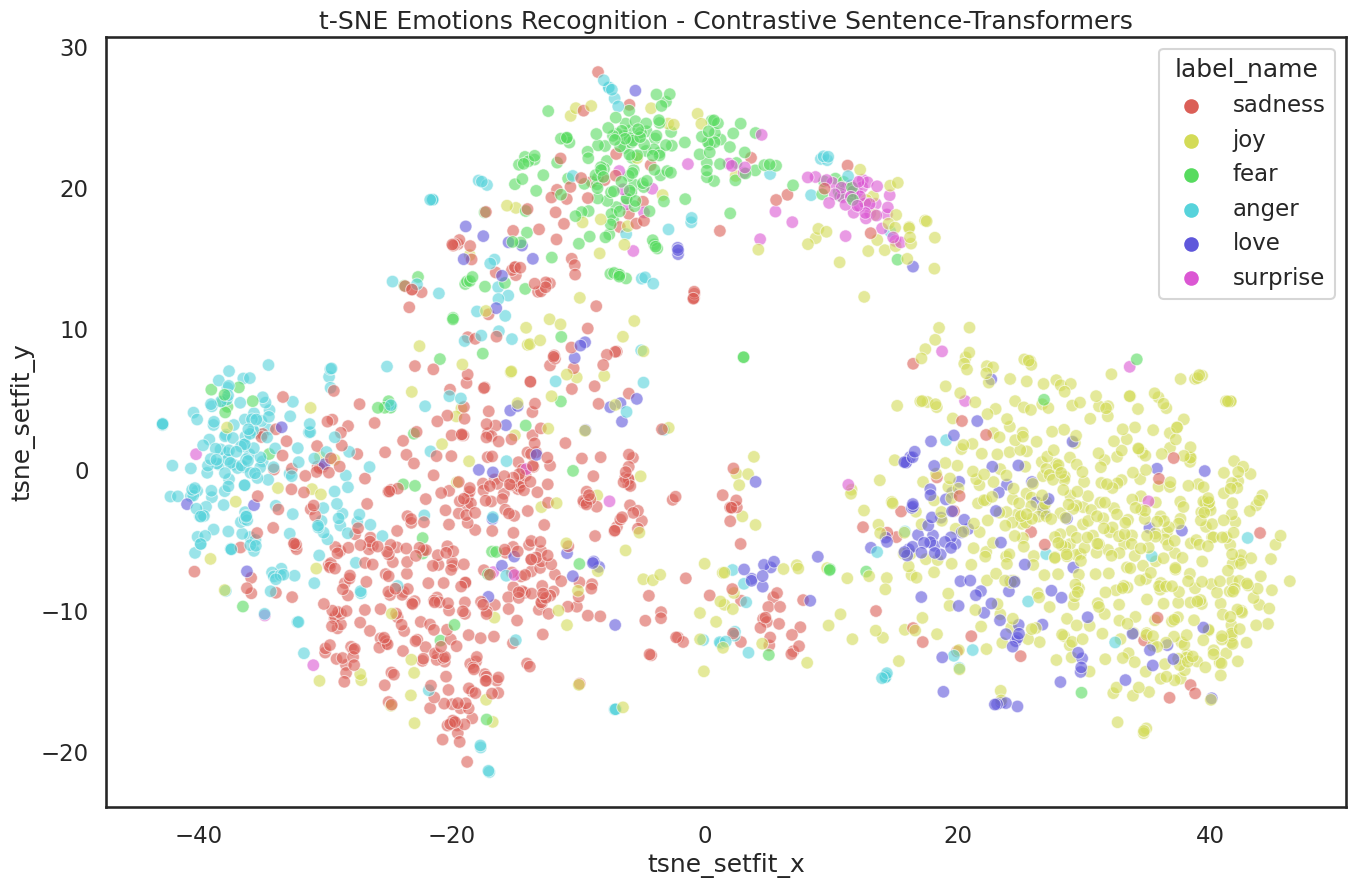

In [24]:
sns.set_context("talk")
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne_setfit_x', y='tsne_setfit_y',
    hue='label_name',
    # title = 't-SNE TREC Keyboeard Error',
    # size = 'source',
    # style = 'source',
    # markers=['o', 'd'],
    palette=sns.color_palette("hls", 6),
    data=teste,
    legend="full",
    alpha=0.6
).set(title='t-SNE Emotions Recognition - Contrastive Sentence-Transformers')